# Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [210]:
path = r'C:\Users\Lapis Lazuli\Documents\Python Projects\CareerFoundry'

In [3]:
df = pd.read_pickle(os.path.join(path, '2 Data','Prepared Data','ords_prods_cust_merged.pkl'))

In [4]:
df_dep = pd.read_csv(os.path.join(path, '2 Data','departments_wrangled.csv'), index_col = False)

### Check that the data was imported correctly

In [5]:
df.head(5)

,user_id,first_name,last_name,gender,state,age,date_joined,#_of_dependants,marital_status,income,...,days_since_prior_order,add_to_cart_order,reordered,_merge,max_order,loyalty_flag,avg_price,spending_flag,frequency,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,30.0,2,0,both,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,11.0,1,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,10.0,2,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,NaN,1,0,both,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,30.0,2,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer


In [6]:
df.shape

(30629741, 30)

In [7]:
df.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', '#_of_dependants', 'marital_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'frequency', 'frequency_flag'],
      dtype='object')

In [8]:
# We'll use a random sample of 70% of the data to not overwhelm any RAM usage and make visualizations load faster

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7
big = df[dev]
small = df[~dev]

df = small

In [9]:
df.shape

(9187984, 30)

### Consider any security implications that might exist for this new data

#### The first and last name of the customer along with their associated information can be traced, including things like their location. Removing the name columns (or even just the last name) is a potential solution to ensure that the customer's privacy is respected

In [10]:
# Drop the first and last name colunms

df = df.drop(columns = ['first_name', 'last_name'])

In [11]:
# Check that the function worked properly

df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', '#_of_dependants',
       'marital_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'frequency', 'frequency_flag'],
      dtype='object')

### Create a regional segmentation of the data

In [12]:
# Check the state column

df['state'].value_counts(dropna = False)

Pennsylvania            189504
California              189106
Rhode Island            186355
Georgia                 186080
Arizona                 185926
North Carolina          185065
Oklahoma                184128
Minnesota               183646
New Mexico              183578
Alaska                  183158
Maine                   182884
Wyoming                 182733
Massachusetts           182499
Mississippi             181929
Texas                   181838
Arkansas                181785
Nevada                  181691
North Dakota            181625
Virginia                181581
Missouri                181305
South Dakota            181116
Louisiana               181060
South Carolina          180982
Washington              180803
Alabama                 180780
Kansas                  180637
Michigan                180636
Colorado                180482
Oregon                  180202
New York                180194
Kentucky                180166
Montana                 180114
Delaware

In [13]:
# Create a list dividing each region

north_east_1 = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
mid_west_2 = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south_3 = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west_4 = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [14]:
# Assign a new column to the new regions

df.loc[df['state'].isin(north_east_1), 'region'] = 'Northeast'
df.loc[df['state'].isin(mid_west_2), 'region'] = 'Midwest'
df.loc[df['state'].isin(south_3), 'region'] = 'South'
df.loc[df['state'].isin(west_4), 'region'] = 'West'

In [15]:
# Check values within new column

df['region'].value_counts(dropna = False)

South        3058600
West         2350624
Midwest      2152081
Northeast    1626679
Name: region, dtype: int64

### Determine whether there's a difference in spending habits between the different U.S. regions

In [16]:
# Create a crosstab to check spending habits

spending_habits = pd.crosstab (df['spending_flag'], df['region'], dropna = False)

In [17]:
spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,44623,30475,59157,44158
Low spender,2107458,1596204,2999443,2306466


#### There seems to be the most amount of high AND low spenders in the south, but considering they make up the most amount of states it makes sense

### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [18]:
# Creating an activity status flag for customers

df.loc[df['max_order']<5, 'activity_flag'] = 'Low activity'
df.loc[df['max_order']>=5, 'activity_flag'] = 'High activity'
df.head(10)

,user_id,gender,state,age,date_joined,#_of_dependants,marital_status,income,product_id,product_name,...,reordered,_merge,max_order,loyalty_flag,avg_price,spending_flag,frequency,frequency_flag,region,activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,0,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,0,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity
10,26711,Female,Missouri,48,1/1/2017,3,married,165665,8617,Assorted Nuggets,...,0,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity
12,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,...,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity
13,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,...,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity
19,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,1,both,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity
21,33890,Female,New Mexico,36,1/1/2017,0,single,59285,890,Organic Diced Tomatoes,...,0,both,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity
22,33890,Female,New Mexico,36,1/1/2017,0,single,59285,3298,Mozzarella String Cheese,...,0,both,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity


In [19]:
# Exclude low-activity customers from the data

df = df[df['activity_flag'] == 'High activity']

#### From this point on the data will only be using the customers with high activity; this will make sampling easier and the visualizations easier to process

In [20]:
# Export the data

#high_activity_df.to_pickle(os.path.join(path, 'Prepared Data','high_activity_df.pkl'))

### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [21]:
# Let's start by looking at each individual column separately and find out more information about them
# We'll start with the age column

df['age'].describe()

count    8.780638e+06
mean     4.947982e+01
std      1.848033e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### Average age is 49
#### The youngest customer is 18 years old (probably to not violate any laws within any states that involve minors ordering services from delivery apps)
#### The oldest customer is 81
#### Let's classify ages within these groups

In [22]:
df.loc[(df['age'] >= 18) & (df['age'] < 35), 'age_category'] = 'Young adult'
df.loc[(df['age'] >= 35) & (df['age'] < 45), 'age_category'] = 'Early middle age'
df.loc[(df['age'] >= 45) & (df['age'] < 65), 'age_category'] = 'Late middle age'
df.loc[(df['age'] >= 65), 'age_category'] = 'Late adulthood'

In [23]:
df['age_category'].value_counts()

Late middle age     2753006
Young adult         2332286
Late adulthood      2322285
Early middle age    1373061
Name: age_category, dtype: int64

In [24]:
# Now let's look at the income column

df['income'].describe()

count    8.780638e+06
mean     9.968392e+04
std      4.312462e+04
min      2.590300e+04
25%      6.733700e+04
50%      9.676600e+04
75%      1.281100e+05
max      5.939010e+05
Name: income, dtype: float64

####  The average income is 99,459
#### The lowest earning customer's income is 25,903
#### The highest earning customer's income is 593,901
#### Classification of income group will be based on the article posted by usnews.com

In [25]:
df.loc[(df['income'] <= 52200), 'income_class'] = 'Low income'
df.loc[(df['income'] > 52200) & (df['income'] <=156600), 'income_class'] = 'Middle income'
df.loc[(df['income'] > 156600), 'income_class'] = 'High income'

In [26]:
df['income_class'].value_counts()

Middle income    6965824
Low income       1043843
High income       770971
Name: income_class, dtype: int64

In [27]:
# Now let's look at the number of dependents column

df['#_of_dependants'].describe()

count    8.780638e+06
mean     1.501491e+00
std      1.118456e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: #_of_dependants, dtype: float64

#### The average number of dependents is 1.5
#### The customer with the least number of dependents is 0
#### The customer with the most amount of dependents is 3
#### I'll leave the profiling alone since it seems redundant to add labels to dependents of 0-3

In [28]:
# Now let's pair the number of dependents with a crossmap of customer's marital statuses

marital_crosstab = pd.crosstab(df['marital_status'],df['#_of_dependants'],dropna = False)

In [29]:
marital_crosstab

#_of_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,753186,0,0,0
living with parents and siblings,0,146205,137782,137766
married,0,2043446,2058735,2062690
single,1440828,0,0,0


#### Makes sense that divorced, widowed, and single customers have no dependents, but it's odd because even 1 or 2 dependents wouldn't be unusual since there are 18 year olds that may still be dependent on their parents or guardians on the app, but perhaps instacart doesn't take those families into account as number of dependents

In [30]:
# Create a profiling variable for orders for the day of the week

day_of_week = df['orders_day_of_week'].value_counts(dropna = False)

In [31]:
day_of_week

0    1676368
1    1536369
6    1216283
5    1143342
2    1140360
3    1042171
4    1025745
Name: orders_day_of_week, dtype: int64

In [32]:
df.loc[(df['orders_day_of_week'] <2), 'day_category'] = 'Weekend'
df.loc[(df['orders_day_of_week'] >=2), 'day_category'] = 'Weekday'

In [33]:
df['day_category'].value_counts(dropna = False)

Weekday    5567901
Weekend    3212737
Name: day_category, dtype: int64

In [34]:
# Create a crosstab to use for a later visualization between age group and day group

day_age = pd.crosstab(df['day_category'],df['age_category'],dropna=False)
day_age

age_category,Early middle age,Late adulthood,Late middle age,Young adult
day_category,,,,
Weekday,867883,1475701,1750874,1473443
Weekend,505178,846584,1002132,858843


In [35]:
# Lastly let's look at the departments

df_dep.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [36]:
# Create a department dictionary, then pair it with the original dataframe

df_dep_map = dict(zip(df_dep['department_id'], df_dep['department']))

In [37]:
df_dep_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [38]:
# Now let's map the customers to the departments and check which departments are the most popular

df['department'] = df['department_id'].map(df_dep_map)

In [39]:
df['department'].value_counts(dropna = False)

produce            2575614
dairy eggs         1466862
snacks              785216
beverages           728530
frozen              600856
pantry              506148
bakery              318473
canned goods        287316
deli                284592
dry goods pasta     233752
household           198041
meat seafood        191911
breakfast           189797
personal care       119775
babies              116040
international        72460
alcohol              41370
pets                 26446
missing              18497
other                 9592
bulk                  9350
Name: department, dtype: int64

#### Produce is the most popular department, with dairy/eggs being second-most popular. Bulk items are the least popular, which implies that people don't order large amounts of stuff from grocery stores through instacart

In [40]:
# Separate customers who buy alcohol vs. those who don't

df.loc[df['department'] != 'alcohol', 'alcohol_drinker'] = 'No'
df.loc[df['department'] == 'alcohol', 'alcohol_drinker'] = 'Yes'

In [41]:
alcohol_count = df['alcohol_drinker'].value_counts(dropna = False)
alcohol_count

No     8739268
Yes      41370
Name: alcohol_drinker, dtype: int64

Text(0.5, 1.0, "Instacart Customer's Drinking Status")

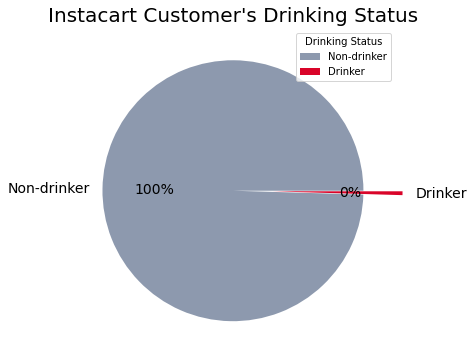

In [195]:
alcohol_pie = alcohol_count.plot.pie(labels=['Non-drinker','Drinker'],autopct=('%1.f%%'),figsize=(10,6),colors=['#8D99AE','#d90429'], label='',textprops={'fontsize':14}, explode = [0,0.3])
alcohol_pie.legend(title = 'Drinking Status')
plt.title("Instacart Customer's Drinking Status",fontsize=20)

In [43]:
# Customers who buy pet supplies

df.loc[df['department'] != 'pets', 'pet_owner'] = 'No'
df.loc[df['department'] == 'pets', 'pet_owner'] = 'Yes'

In [44]:
pet = df['pet_owner'].value_counts(dropna = False)

In [45]:
pet

No     8754192
Yes      26446
Name: pet_owner, dtype: int64

Text(0.5, 1.0, 'Instacart Customers with vs. without Pets')

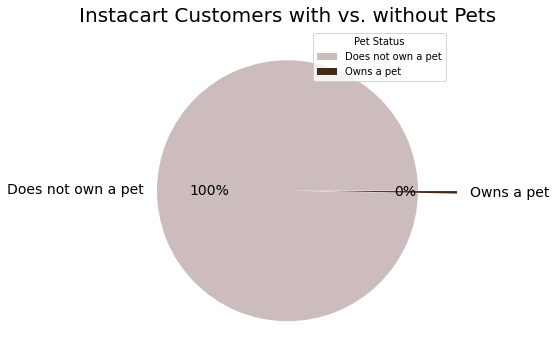

In [199]:
pet_pie = pet.plot.pie(labels=['Does not own a pet','Owns a pet'],autopct=('%1.f%%'),figsize=(10,6),colors=['#CCBCBC','#432818'], label='',textprops={'fontsize':14}, explode = [0,0.3])
pet_pie.legend(title = 'Pet Status')
plt.title("Instacart Customers with vs. without Pets",fontsize=20)

In [47]:
# Customers who buy baby products (implied to have a child)

df.loc[df['department'] != 'babies', 'has_a_child'] = 'No'
df.loc[df['department'] == 'babies', 'has_a_child'] = 'Yes'

In [48]:
baby = df['has_a_child'].value_counts(dropna = False)
baby

No     8664598
Yes     116040
Name: has_a_child, dtype: int64

Text(0.5, 1.0, 'Instacart Customers with vs. without Babies')

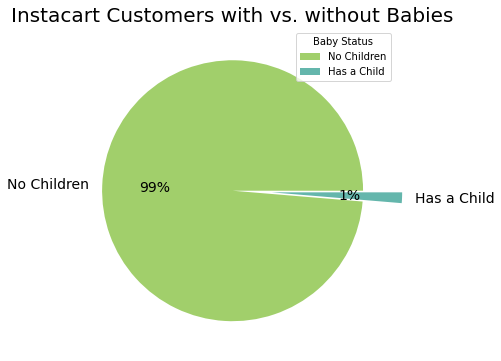

In [204]:
baby_pie = baby.plot.pie(labels=['No Children','Has a Child'],autopct=('%1.f%%'),figsize=(10,6),colors=['#A1CF6B','#64B6AC'], label='',textprops={'fontsize':14}, explode = [0,0.3])
baby_pie.legend(title = 'Baby Status')
plt.title("Instacart Customers with vs. without Babies",fontsize=20)

#### Let's examine the different income classes across each region

In [50]:
# Create a crosstab between region and income class

region_income = pd.crosstab (df['region'],df['income_class'],dropna=False)

In [51]:
region_income

income_class,High income,Low income,Middle income
region,,,
Midwest,180406,244282,1632265
Northeast,135726,184257,1233773
South,259350,355616,2308088
West,195489,259688,1791698


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

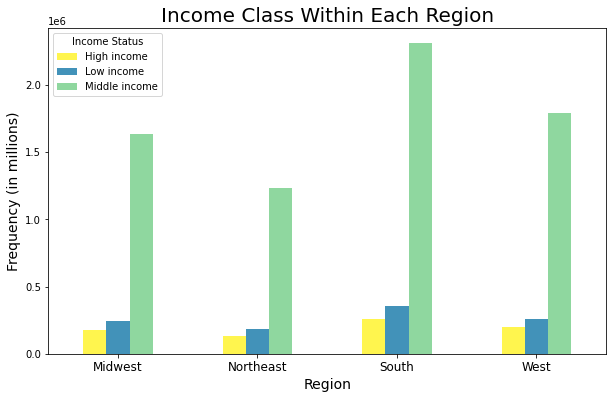

In [217]:
# Plot the data

region_income_bar = region_income.plot(kind = 'bar',figsize=(10,6),color=['#FFF54E','#4292B9','#8Fd79F'])
region_income_bar.legend(title = 'Income Status',loc='upper left')
plt.title('Income Class Within Each Region', fontsize = 20)
plt.ylabel('Frequency (in millions)',fontsize=14)
plt.xlabel('Region',fontsize=14)
plt.xticks(rotation=0,fontsize=12)

#### It's a bit hard to tell if there's any significant differences or trends between income and region. The south notably has the most customers with middle-level incomes, but that may be because their population is a lot bigger than the other regions

#### Let's examine if there's any trends between age groups and whether they shop during the week or the weekends

(array([0, 1]), [Text(0, 0, 'Weekday'), Text(1, 0, 'Weekend')])

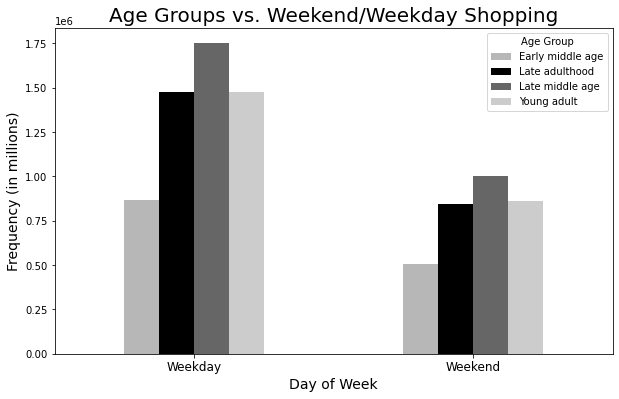

In [165]:
# Use the previous crosstab created earlier to use for the plot

day_age_bar = day_age.plot(kind='bar',figsize=(10,6), color=['#b7b7b7', '#000000', '#666666', '#cccccc'])
day_age_bar.legend(title = 'Age Group')
plt.title('Age Groups vs. Weekend/Weekday Shopping', fontsize=20)
plt.ylabel('Frequency (in millions)',fontsize=14)
plt.xlabel('Day of Week',fontsize=14)
plt.xticks(rotation=0,fontsize=12)

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [54]:
df.groupby('department').agg({'prices':['max','min','mean']})

prices                
                     max  min       mean
department                              
alcohol             15.0  1.0   8.151189
babies              15.0  1.0   7.632759
bakery              15.0  1.0   7.854219
beverages           15.0  1.0   7.689954
breakfast           14.9  1.0   8.025784
bulk                14.1  1.4   8.410503
canned goods        15.0  1.0   7.554412
dairy eggs       99999.0  1.0  33.494198
deli                15.0  1.0   7.783377
dry goods pasta     15.0  1.0   7.346812
frozen              15.0  1.0   7.734401
household           15.0  1.0   7.389337
international       15.0  1.0   7.686020
meat seafood        25.0  8.0  16.303920
missing             15.0  1.0   8.634530
other               15.0  1.1   6.996122
pantry              20.0  1.0   7.998677
personal care       15.0  1.0   7.986280
pets                15.0  1.0   7.844075
produce             15.0  1.0   7.980386
snacks               7.0  1.6   4.276620

#### Clearly there's something wrong with the dairy/eggs row. Let's delete the obvious outliers. It's safe to assume that there won't be anything that costs over 5000 at a grocery store, so let's remove anything above that price

In [55]:
df.drop(df[df['prices'] > 5000].index, inplace=True)

In [56]:
df.groupby('department').agg({'prices':['max','min','mean']})

prices                
                   max  min       mean
department                            
alcohol           15.0  1.0   8.151189
babies            15.0  1.0   7.632759
bakery            15.0  1.0   7.854219
beverages         15.0  1.0   7.689954
breakfast         14.9  1.0   8.025784
bulk              14.1  1.4   8.410503
canned goods      15.0  1.0   7.554412
dairy eggs        15.0  1.0   8.335460
deli              15.0  1.0   7.783377
dry goods pasta   15.0  1.0   7.346812
frozen            15.0  1.0   7.734401
household         15.0  1.0   7.389337
international     15.0  1.0   7.686020
meat seafood      25.0  8.0  16.303920
missing           15.0  1.0   8.634530
other             15.0  1.1   6.996122
pantry            20.0  1.0   7.998677
personal care     15.0  1.0   7.986280
pets              15.0  1.0   7.844075
produce           15.0  1.0   7.980386
snacks             7.0  1.6   4.276620

In [61]:
# Department aggregation based on frequency

df.groupby('department').agg({'add_to_cart_order':['max','min','mean']})

add_to_cart_order               
                              max min       mean
department                                      
alcohol                        71   1   5.453058
babies                         89   1  10.590141
bakery                        114   1   8.094306
beverages                     135   1   7.007117
breakfast                     117   1   9.155766
bulk                           71   1   8.443316
canned goods                   94   1   9.977234
dairy eggs                    137   1   7.514342
deli                          142   1   8.703671
dry goods pasta               104   1  10.212221
frozen                        123   1   9.011760
household                     115   1   8.529219
international                 106   1   9.947240
meat seafood                   90   1   8.557118
missing                        71   1   9.374493
other                          72   1   8.215075
pantry                        107   1   9.617616
personal care                 125   1   8.739896
pets                          121   1   7.731680
produce                       138   1   8.035760
snacks                        132   1   9.193943

In [57]:
# Alcohol drinker aggregation

df.groupby('alcohol_drinker').agg({'prices' :['max','min','mean']})

prices               
                   max  min      mean
alcohol_drinker                      
No                25.0  1.0  7.788839
Yes               15.0  1.0  8.151189

In [62]:
# Alcohol drinker frequency aggregation

df.groupby('alcohol_drinker').agg({'add_to_cart_order' :['max','min','mean']})

add_to_cart_order              
                              max min      mean
alcohol_drinker                                
No                            142   1  8.380253
Yes                            71   1  5.453058

In [58]:
# Pet owner aggregation

df.groupby('pet_owner').agg({'prices' :['max','min','mean']})

prices               
             max  min      mean
pet_owner                      
No          25.0  1.0  7.790385
Yes         15.0  1.0  7.844075

In [63]:
# Pet owner frequency aggregation

df.groupby('pet_owner').agg({'add_to_cart_order' :['max','min','mean']})

add_to_cart_order              
                        max min      mean
pet_owner                                
No                      142   1  8.368377
Yes                     121   1  7.731680

In [60]:
# Aggregation for customers with a child

df.groupby('has_a_child').agg({'prices' :['max','min','mean']})

prices               
               max  min      mean
has_a_child                      
No            25.0  1.0  7.792660
Yes           15.0  1.0  7.632759

In [64]:
# Customers with children frequency aggregation

df.groupby('has_a_child').agg({'add_to_cart_order' :['max','min','mean']})

add_to_cart_order               
                          max min       mean
has_a_child                                 
No                        142   1   8.336674
Yes                        89   1  10.590141

In [65]:
# Age category aggregation

df.groupby('age_category').agg({'prices' :['max','min','mean']})

prices               
                    max  min      mean
age_category                          
Early middle age   25.0  1.0  7.796696
Late adulthood     25.0  1.0  7.795373
Late middle age    25.0  1.0  7.790187
Young adult        25.0  1.0  7.782545

In [66]:
# Age category frequnecy aggregation

df.groupby('age_category').agg({'add_to_cart_order' :['max','min','mean']})

add_to_cart_order              
                               max min      mean
age_category                                    
Early middle age               108   1  8.371146
Late adulthood                  98   1  8.315452
Late middle age                142   1  8.367787
Young adult                    107   1  8.412922

In [68]:
# Aggregation based on income class

df.groupby('income_class').agg({'prices' :['max','min','mean']})

prices               
                 max  min      mean
income_class                       
High income     25.0  1.0  7.939023
Low income      25.0  1.0  6.764508
Middle income   25.0  1.0  7.927896

In [69]:
# Income class frequency aggregation

df.groupby('income_class').agg({'add_to_cart_order' :['max','min','mean']})

add_to_cart_order              
                            max min      mean
income_class                                 
High income                 121   1  8.524178
Low income                  137   1  7.397739
Middle income               142   1  8.494198

In [70]:
# Aggregation based on number of dependents

df.groupby('#_of_dependants').agg({'prices' :['max','min','mean']})

prices               
                   max  min      mean
#_of_dependants                      
0                 25.0  1.0  7.784387
1                 25.0  1.0  7.800376
2                 25.0  1.0  7.785895
3                 25.0  1.0  7.791550

In [71]:
# Number of dependents frequency aggregation

df.groupby('#_of_dependants').agg({'add_to_cart_order' :['max','min','mean']})

add_to_cart_order              
                              max min      mean
#_of_dependants                                
0                             137   1  8.351180
1                             109   1  8.385807
2                             104   1  8.353183
3                             142   1  8.375694

In [73]:
# Weekend vs. Weekday shopper aggregation

df.groupby('day_category').agg({'prices' :['max','min','mean']})

prices               
                max  min      mean
day_category                      
Weekday        25.0  1.0  7.779708
Weekend        25.0  1.0  7.809330

In [74]:
# Weekend vs. Weekday shopper frequency aggregation

df.groupby('day_category').agg({'add_to_cart_order' :['max','min','mean']})

add_to_cart_order              
                           max min      mean
day_category                                
Weekday                    142   1  8.228562
Weekend                    112   1  8.605445

In [75]:
# Marital status aggregation

df.groupby('marital_status').agg({'prices' :['max','min','mean']})

prices               
                                    max  min      mean
marital_status                                        
divorced/widowed                   25.0  1.0  7.799961
living with parents and siblings   25.0  1.0  7.806237
married                            25.0  1.0  7.791665
single                             25.0  1.0  7.776246

In [76]:
# Marital status frequency aggregation

df.groupby('marital_status').agg({'add_to_cart_order' :['max','min','mean']})

add_to_cart_order              
                                               max min      mean
marital_status                                                  
divorced/widowed                               137   1  8.402176
living with parents and siblings               102   1  8.378009
married                                        142   1  8.371107
single                                         108   1  8.324524

### Compare your customer profiles with regions and departments

In [86]:
# Comparing income class vs. frequency of purchases

income_frequency_crosstab = pd.crosstab(df['income_class'], df['add_to_cart_order'].count(), dropna = False)
income_frequency_crosstab

col_0,8779257
income_class,
High income,769994
Low income,1043843
Middle income,6965420


(array([0, 1, 2]),
 [Text(0, 0, 'High income'),
  Text(1, 0, 'Low income'),
  Text(2, 0, 'Middle income')])

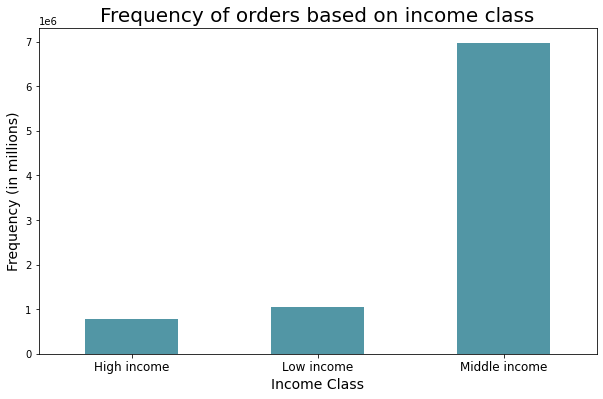

In [206]:
hour_age_bar = income_frequency_crosstab.plot(kind = 'bar',figsize=(10,6), color=['#5296A5'])
hour_age_bar.legend('',frameon=False)
plt.title('Frequency of orders based on income class',fontsize=20)
plt.xlabel('Income Class',fontsize=14)
plt.ylabel('Frequency (in millions)',fontsize=14)
plt.xticks(rotation=0,fontsize=12)

#### Interestingly enough it looks like low income class customers use the app slightly more than higher income

In [93]:
# Let's examine which hours of the day are the most popular for shoppers

df.loc[(df['order_hour_of_day'] <= 6), 'hour_category'] = 'Midnight'
df.loc[(df['order_hour_of_day'] > 6) & (df['order_hour_of_day'] <= 12), 'hour_category'] = 'Morning'
df.loc[(df['order_hour_of_day'] > 12) & (df['order_hour_of_day'] <= 18), 'hour_category'] = 'Afternoon'
df.loc[(df['order_hour_of_day'] > 18), 'hour_category'] = 'Evening'

In [95]:
df['hour_category'].value_counts(dropna = False)

Afternoon    3854185
Morning      3585063
Evening      1099865
Midnight      240144
Name: hour_category, dtype: int64

In [96]:
# Create a bar chart between hour categories and number of purchases
hour_order_crosstab = pd.crosstab(df['hour_category'], df['add_to_cart_order'].count(), dropna = False)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Afternoon'),
  Text(1, 0, 'Evening'),
  Text(2, 0, 'Midnight'),
  Text(3, 0, 'Morning')])

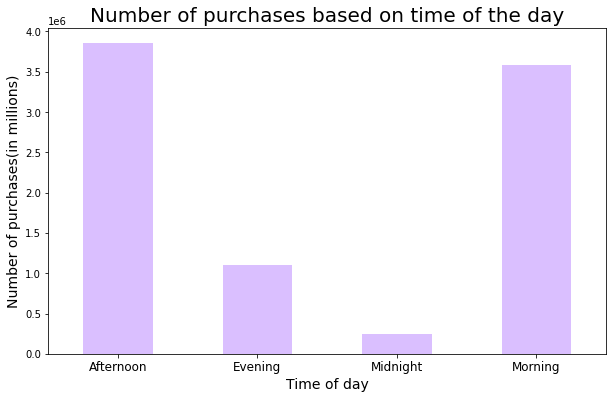

In [148]:
hour_purchase_bar = hour_order_crosstab.plot(kind = 'bar',figsize=(10,6), color = ['#DABFFF'])
hour_purchase_bar.legend('',frameon=False)
plt.title('Number of purchases based on time of the day',fontsize=20)
plt.xlabel('Time of day',fontsize=14)
plt.ylabel('Frequency (in millions)',fontsize=14)
plt.xticks(rotation=0,fontsize=12)

In [98]:
# Compare different regions and purchases made throughout the day

region_hour_crosstab = pd.crosstab(df['hour_category'],df['region'], dropna=False)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Afternoon'),
  Text(1, 0, 'Evening'),
  Text(2, 0, 'Midnight'),
  Text(3, 0, 'Morning')])

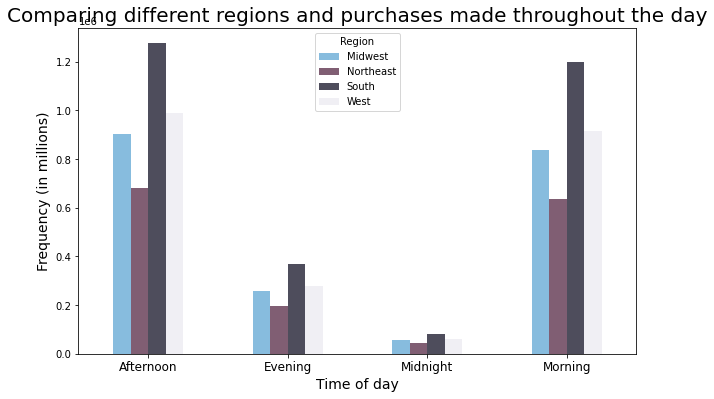

In [163]:
region_hour_bar = region_hour_crosstab.plot(kind = 'bar', figsize=(10,6), color = ['#87BCDE', '#805E73', '#4E4D5C','#f0EFF4'])
region_hour_bar.legend(title = 'Region')
plt.title('Comparing different regions and purchases made throughout the day',fontsize=20)
plt.xlabel('Time of day', fontsize=14)
plt.ylabel('Frequency (in millions)', fontsize=14)
plt.xticks(rotation=0,fontsize=12)

In [224]:
# Compare departments and regions

dpt_crosstab = pd.crosstab(df['department'], df['add_to_cart_order'].count(),dropna=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

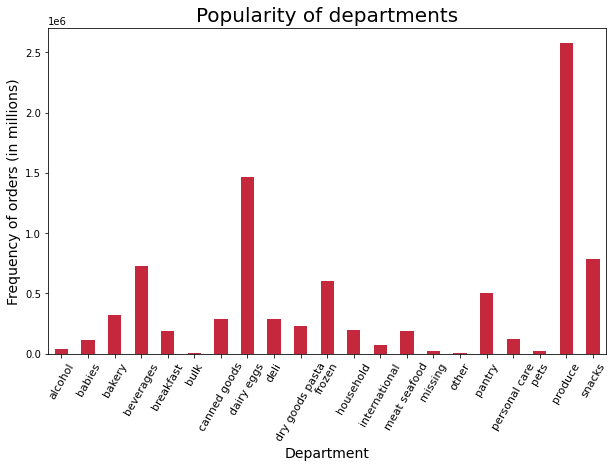

In [225]:
dpt_bar = region_dpt_crosstab.plot(kind = 'bar',figsize=(10,6), color=['#C5283D'])
dpt_bar.legend('',frameon=False)
plt.title('Popularity of departments',fontsize=20)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Frequency of orders (in millions)',fontsize=14)
plt.xticks(rotation=60,fontsize=11)

### Export visualizations

In [208]:
# Export the new dataframe as a pkl format
df.to_pickle(os.path.join(path,'2 Data','Prepared Data','high_activity_df.pkl'))

In [212]:
# Alcohol Pie Chart
alcohol_pie.figure.savefig(os.path.join(path, '4 Analysis','Visualizations','alcohol_pie.png'))

In [213]:
# Pet Owners Pie
pet_pie.figure.savefig(os.path.join(path, '4 Analysis','Visualizations','pet_owner_pie.png'))

In [214]:
# Customers With Babies Pie
baby_pie.figure.savefig(os.path.join(path, '4 Analysis','Visualizations','babies_pie.png'))

In [219]:
# Income Classes within each Region
region_income_bar.figure.savefig(os.path.join(path, '4 Analysis','Visualizations','region_income_bar.png'))

In [220]:
# Age Group Day of Week Bar
day_age_bar.figure.savefig(os.path.join(path, '4 Analysis','Visualizations','days_age_group_bar.png'))

In [221]:
# Frequency of Orders based on Income Class Bar
hour_age_bar.figure.savefig(os.path.join(path, '4 Analysis','Visualizations','hour_age_bar.png'))

In [222]:
# Time of Day and Orders Bar
hour_purchase_bar.figure.savefig(os.path.join(path, '4 Analysis','Visualizations','hour_purchase_bar.png'))

In [223]:
# Region Hour Purchase Bar
region_hour_bar.figure.savefig(os.path.join(path, '4 Analysis','Visualizations','region_hour_purchase_bar.png'))

In [226]:
# Department Popularity Bar
dpt_bar.figure.savefig(os.path.join(path, '4 Analysis','Visualizations','department_popularity_bar.png'))